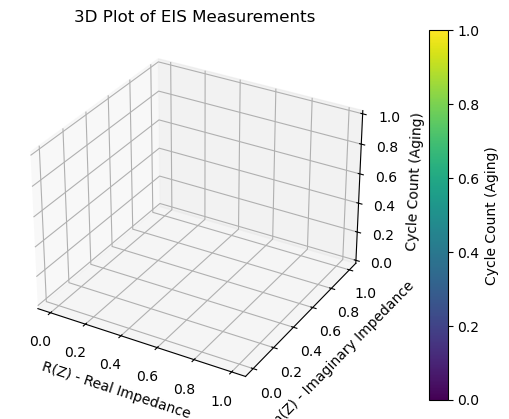

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# File path for the CSV file
file_path = 'C:\\Users\\hp\\Downloads\\archive\\cleaned_dataset\\metadata.csv'

# Load CSV data
csv_data = pd.read_csv(file_path)

# Convert CSV data to .mat format
mat_file_path = 'C:\\Users\\hp\\Downloads\\archive\\cleaned_dataset\\metadata.mat'
data_dict = csv_data.to_dict(orient='list')
scipy.io.savemat(mat_file_path, {'data': data_dict})

# Load the .mat file
mat_data = scipy.io.loadmat(mat_file_path)
data = mat_data['data']

# Keys for relevant columns
RZ_key = 'Re'                # Update based on CSV column names
ImZ_key = 'Rct'              # Update based on CSV column names
CycleCount_key = 'Capacity'  # Update based on CSV column names

# Ensure keys exist in the dataset
if RZ_key not in data_dict or ImZ_key not in data_dict or CycleCount_key not in data_dict:
    raise ValueError("Column names not found in the dataset. Please verify.")

# Extract and clean data
def clean_column(column):
    cleaned = []
    for val in column:
        try:
            cleaned.append(float(val))  # Try converting to float
        except (ValueError, TypeError):
            cleaned.append(np.nan)  # Replace invalid entries with NaN
    return np.array(cleaned)

RZ = np.array([complex(val).real for val in data_dict[RZ_key]], dtype=float)  # Real part of Impedance
ImZ = np.array([complex(val).imag for val in data_dict[ImZ_key]], dtype=float)  # Imaginary part of Impedance
CycleCount = clean_column(data_dict[CycleCount_key])  # Clean CycleCount column

# Handle NaN values
valid_indices = ~np.isnan(RZ) & ~np.isnan(ImZ) & ~np.isnan(CycleCount)
RZ = RZ[valid_indices]
ImZ = ImZ[valid_indices]
CycleCount = CycleCount[valid_indices]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data
scatter = ax.scatter(RZ, ImZ, CycleCount, c=CycleCount, cmap='viridis', marker='o')

# Add labels and title
ax.set_xlabel('R(Z) - Real Impedance')
ax.set_ylabel('Im(Z) - Imaginary Impedance')
ax.set_zlabel('Cycle Count (Aging)')
ax.set_title('3D Plot of EIS Measurements')

# Add color bar for Cycle Count
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cycle Count (Aging)')

# Show the plot
plt.show()
